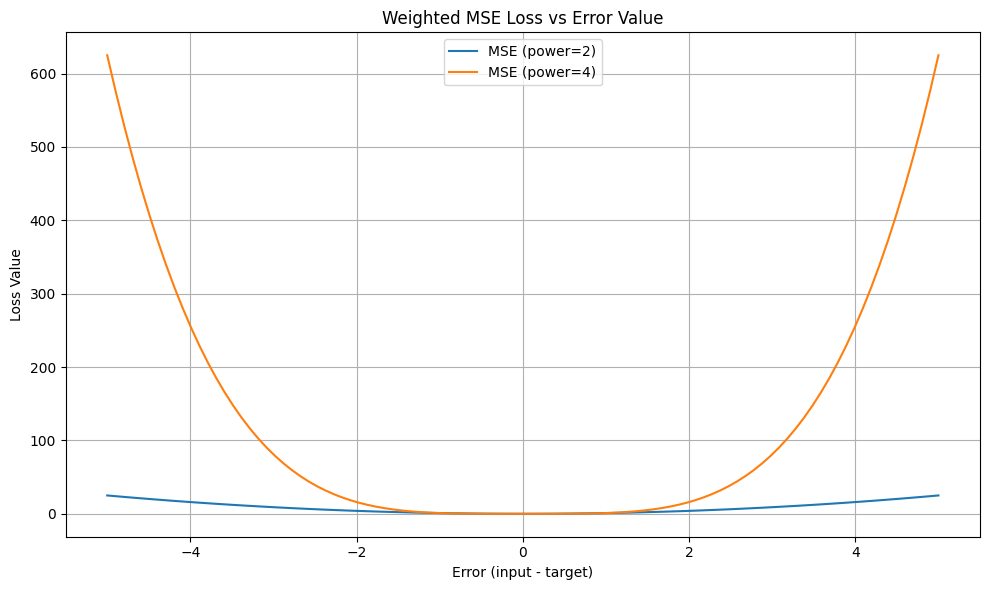

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class WeightedMSELoss(nn.Module):
    """Mean Squared Error loss with optional per-feature weighting."""
    def __init__(self, weights: torch.Tensor = None, reduction: str = 'mean', power: int = 2):
        """
        Args:
            weights (torch.Tensor): Optional tensor of weights for each feature.
                                    If None, all features are equally weighted.
            reduction (str): Specifies the reduction to apply to the output:
                             'none' | 'mean' | 'sum'. Default is 'mean'.
            power (int): The power to which the differences are raised. Default is 2 for MSE.
        """
        super(WeightedMSELoss, self).__init__()
        self.reduction = reduction
        self.power = power

        if weights is not None:
            self.register_buffer('weights', weights.view(1, 1, -1))
        else:
            self.weights = None

    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        diff = (input - target).pow(self.power)
        
        if self.weights is not None:
            diff = diff * self.weights
        
        if self.reduction == 'mean':
            return diff.mean()
        elif self.reduction == 'sum':
            return diff.sum()
        elif self.reduction == 'none':
            return diff
        else:
            raise ValueError(f"Unsupported reduction '{self.reduction}'")

def plot_weighted_mse_loss():
    # Create error range from -5 to 5
    errors = np.linspace(-5, 5, 100)
    
    # Create dummy input and target tensors
    input_tensor = torch.from_numpy(errors).float().unsqueeze(0).unsqueeze(-1)  # shape (1, 100, 1)
    target_tensor = torch.zeros_like(input_tensor)
    
    # Different scenarios to plot
    scenarios = [
        ("MSE (power=2)", None),
        ("MSE (power=4)", 4),
    ]
    
    plt.figure(figsize=(10, 6))
    
    for label, power in scenarios:
        # Create the loss function with or without weights
        if power is not None:
            loss_fn = WeightedMSELoss(power=power)
        else:
            loss_fn = WeightedMSELoss()
            
        # Compute the loss for each error value
        losses = []
        for error in errors:
            input_tensor.fill_(error)
            loss = loss_fn(input_tensor, target_tensor)
            losses.append(loss.item())
        
        plt.plot(errors, losses, label=label)
    
    plt.title("¡MSE Loss vs Error Value")
    plt.xlabel("Error (input - target)")
    plt.ylabel("Loss Value")
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Run the visualization
plot_weighted_mse_loss()